<a href="https://colab.research.google.com/github/Jeff980720/Modulo-5/blob/main/Reto18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                     Fecha      Precio  Unidades Vendidas  Costo de Producción
count                   10   10.000000          10.000000            10.000000
mean   2021-06-03 14:24:00   86.500000          25.500000            51.200000
min    2021-06-01 00:00:00   10.000000           5.000000             5.000000
25%    2021-06-02 06:00:00   27.500000          10.500000            15.000000
50%    2021-06-03 12:00:00   85.000000          20.000000            45.000000
75%    2021-06-05 00:00:00  127.500000          37.500000            77.500000
max    2021-06-06 00:00:00  200.000000          60.000000           120.000000
std                    NaN   63.859655          19.091883            40.358945
                   Unidades Vendidas    Precio
Unidades Vendidas           1.000000 -0.895623
Precio                     -0.895623  1.000000
Empty DataFrame
Columns: [Producto, Fecha, Categoría, Precio, Unidades Vendidas, Costo de Producción, Método de Pago, Ciudad]
Index: []
Empty DataFr

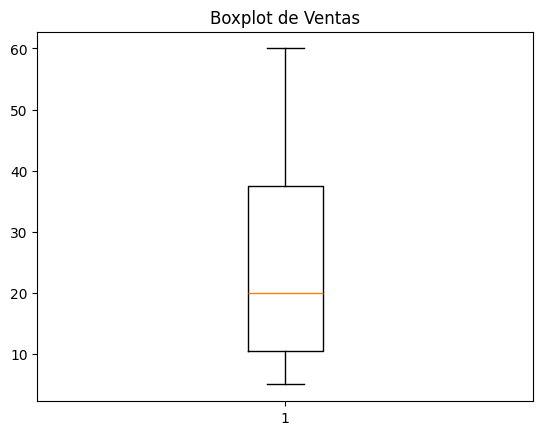

In [20]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los datos de la imagen
data = {
    'Producto': ['E', 'F', 'G', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Fecha': ['2021-06-01', '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-05', '2021-06-06', '2021-06-06'],
    'Categoría': ['Electrónica', 'Ropa', 'Alimentación', 'Electrónica', 'Ropa', 'Alimentación', 'Electrónica', 'Ropa', 'Alimentación', 'Electrónica'],
    'Precio': [120, 50, 20, 150, 90, 10, 200, 80, 15, 130],
    'Unidades Vendidas': [15, 30, 50, 5, 12, 60, 8, 25, 40, 10],
    'Costo de Producción': [80, 30, 10, 100, 50, 5, 120, 40, 7, 70],
    'Método de Pago': ['Tarjeta de Crédito', 'PayPal', 'Efectivo', 'Tarjeta de Crédito', 'PayPal', 'Efectivo', 'Tarjeta de Crédito', 'PayPal', 'Efectivo', 'Tarjeta de Crédito'],
    'Ciudad': ['Quito', 'Cuenca', 'Guayaquil', 'Loja', 'Ambato', 'Quito', 'Guayaquil', 'Cuenca', 'Quito', 'Loja']
}

df = pd.DataFrame(data)

# print(df)
# print(df.dtypes)

df['Fecha']=pd.to_datetime(df['Fecha'])
df['Categoría']=df['Categoría'].astype('category')
df['Método de Pago']=df['Método de Pago'].astype('category')

# print(df.dtypes)

media_ventas=df['Unidades Vendidas'].mean()
# print(f"La media de las ventas es: {media_ventas}")

desviacion_estandar_ventas=df['Unidades Vendidas'].std()
# print(f"La desviación estándar de las ventas es: {desviacion_estandar_ventas}")

print(df.describe())

correlacion=df[['Unidades Vendidas','Precio']].corr()
print(correlacion)

q1=df['Unidades Vendidas'].quantile(0.25)
q3=df['Unidades Vendidas'].quantile(0.75)
iqr=q3-q1

limite_superior=q3+1.5*iqr
limite_inferior=q1-1.5*iqr

# print(f"El límite superior es: {limite_superior}")
# print(f"El límite inferior es: {limite_inferior}")
# print(df['Unidades Vendidas'])

filtro=df[(df['Unidades Vendidas']<limite_inferior) | (df['Unidades Vendidas']>limite_superior)]
print(filtro)

z_scores=stats.zscore(df['Unidades Vendidas'])
# df['Unidades Vendidas_Z']=z_scores
outlier=df[(z_scores>2)|(z_scores<-2)]
print(outlier)

df['Unidades Vendidas']=np.where((z_scores<-2)|(z_scores>2),media_ventas,df['Unidades Vendidas'])
print(df)

plt.boxplot(df['Unidades Vendidas'])
plt.title('Boxplot de Ventas')
plt.show()